# Overview

# Imports

In [1]:
import sys
sys.path.append('../src')

In [5]:
# packages
import glob
from google import genai
import imgkit
from html2image import Html2Image
from IPython.display import Image, display
from pathlib import Path

In [3]:
# modules

# converts html to png
import utils


# Paths

In [4]:
# input path for synthetic clinical reports generated using LLM
html_dir = Path('../data/llm_html_reports/')

# output path for HTML images converted to PNG images using imgkit
image_dir = Path('../data/png_reports/')

# HTML inputs and conversion to PNG using imgkit

## Input HTML files - preview & check

In [24]:
html_list = list(html_dir.glob('*'))

In [35]:
html_list

[PosixPath('../data/llm_html_reports/claude_synthetic_report_5.html'),
 PosixPath('../data/llm_html_reports/claude_synthetic_report_4.html'),
 PosixPath('../data/llm_html_reports/claude_synthetic_report_3.html'),
 PosixPath('../data/llm_html_reports/claude_synthetic_report_2.html'),
 PosixPath('../data/llm_html_reports/claude_synthetic_report_1.html'),
 PosixPath('../data/llm_html_reports/claude_synthetic_report_7.html'),
 PosixPath('../data/llm_html_reports/claude_synthetic_report_6.html')]

In [26]:
html_list[0]

PosixPath('../data/llm_html_reports/claude_synthetic_report_5.html')

In [34]:
with open(list(html_dir.glob('*'))[0], 'r') as file_obj:
    print(file_obj.read()[:500])

<!DOCTYPE html>
<html>
<head>
<style>
  body {
    font-family: Arial, sans-serif;
    font-size: 12px;
    line-height: 1.3;
    margin: 0;
    padding: 20px;
    color: #000;
  }
  .report-wrapper {
    max-width: 800px;
    margin: 0 auto;
    border: 1px solid #ccc;
  }
  .logo-container {
    text-align: center;
    padding: 10px 0;
    margin-bottom: 10px;
  }
  .logo {
    width: 100px;
    height: 50px;
    margin: 0 auto;
    display: flex;
    align-items: center;
    justify-content: 


## HTML --> PNG using imgkit : PNG didn't render correctly

Test on 1 HTML file to see how imgkit does.

In [71]:
html_list[0]

PosixPath('../data/llm_html_reports/claude_synthetic_report_5.html')

In [73]:
imgkit.from_file(str(html_list[0]),
                 str(image_dir / 'imgkit_test.png'))

Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


True

* It doesn't render properly: the top right panel of text is missing and instead of a checkmark in front of 'Streptococcus', there are weird characters.

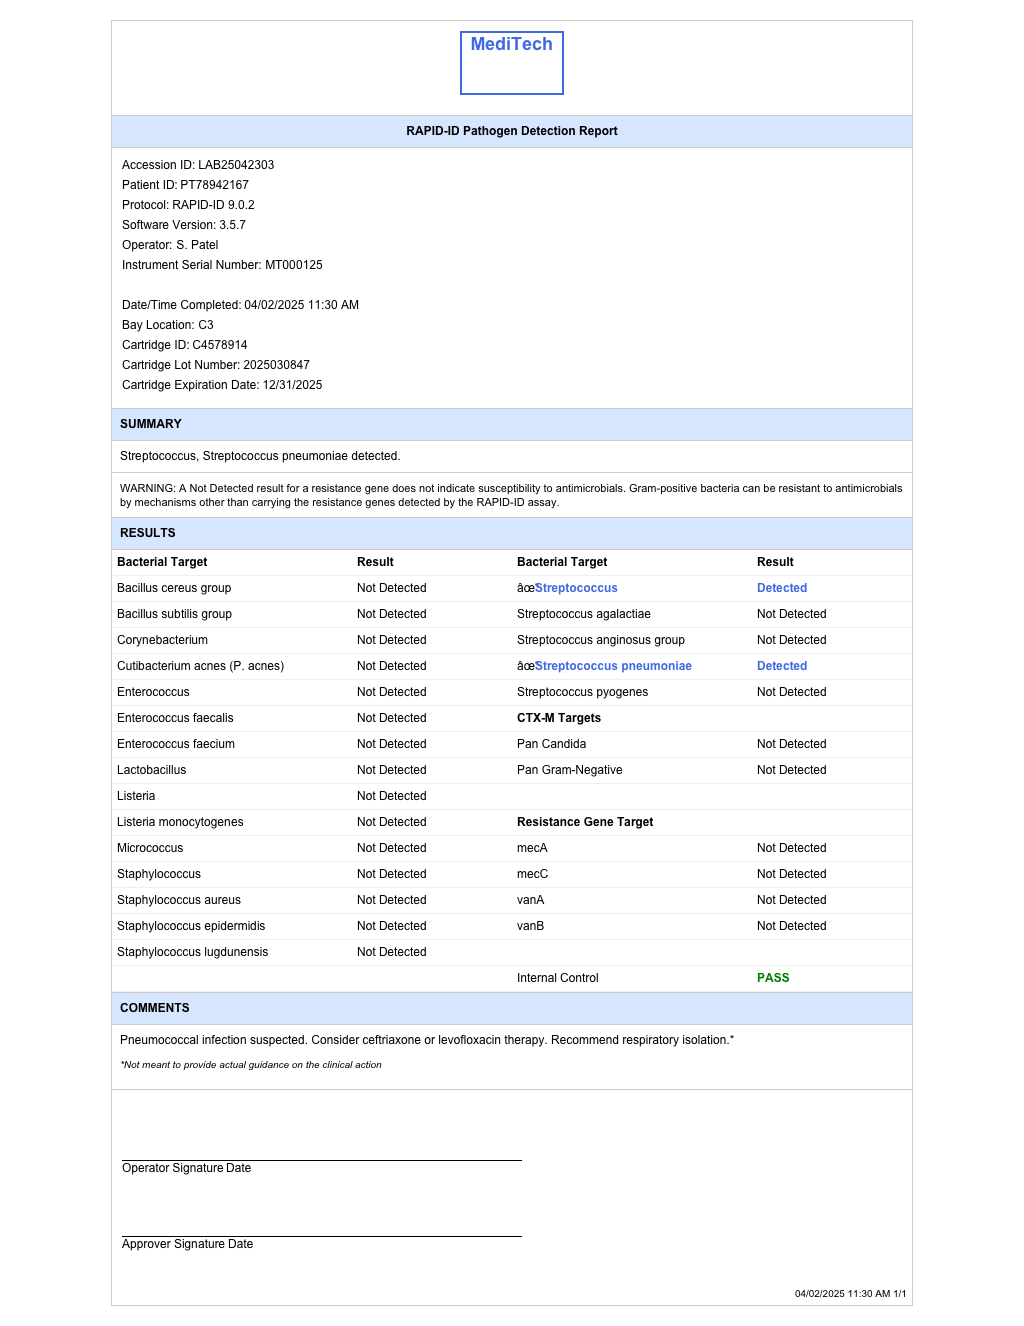

In [74]:
display(Image(filename=str(image_dir / 'imgkit_test.png')))

## HTML -> PNG using html2png works better

In [75]:
chrome_path = "/Applications/Google Chrome.app/Contents/MacOS/Google Chrome"

In [82]:
hti = Html2Image(browser_executable=chrome_path,
                 custom_flags=["--headless=new"],
                 output_path=str(image_dir),
                 size=(800,1220))

png_paths = hti.screenshot(html_file=str(html_list[0]),
                           save_as='html2image_test.png')

290226 bytes written to file /Users/mukti/Documents/learning_courses/image_to_data/synthetic_data_lab_reports/data/png_reports/html2image_test.png


In [83]:
png_paths

['/Users/mukti/Documents/learning_courses/image_to_data/synthetic_data_lab_reports/data/png_reports/html2image_test.png']

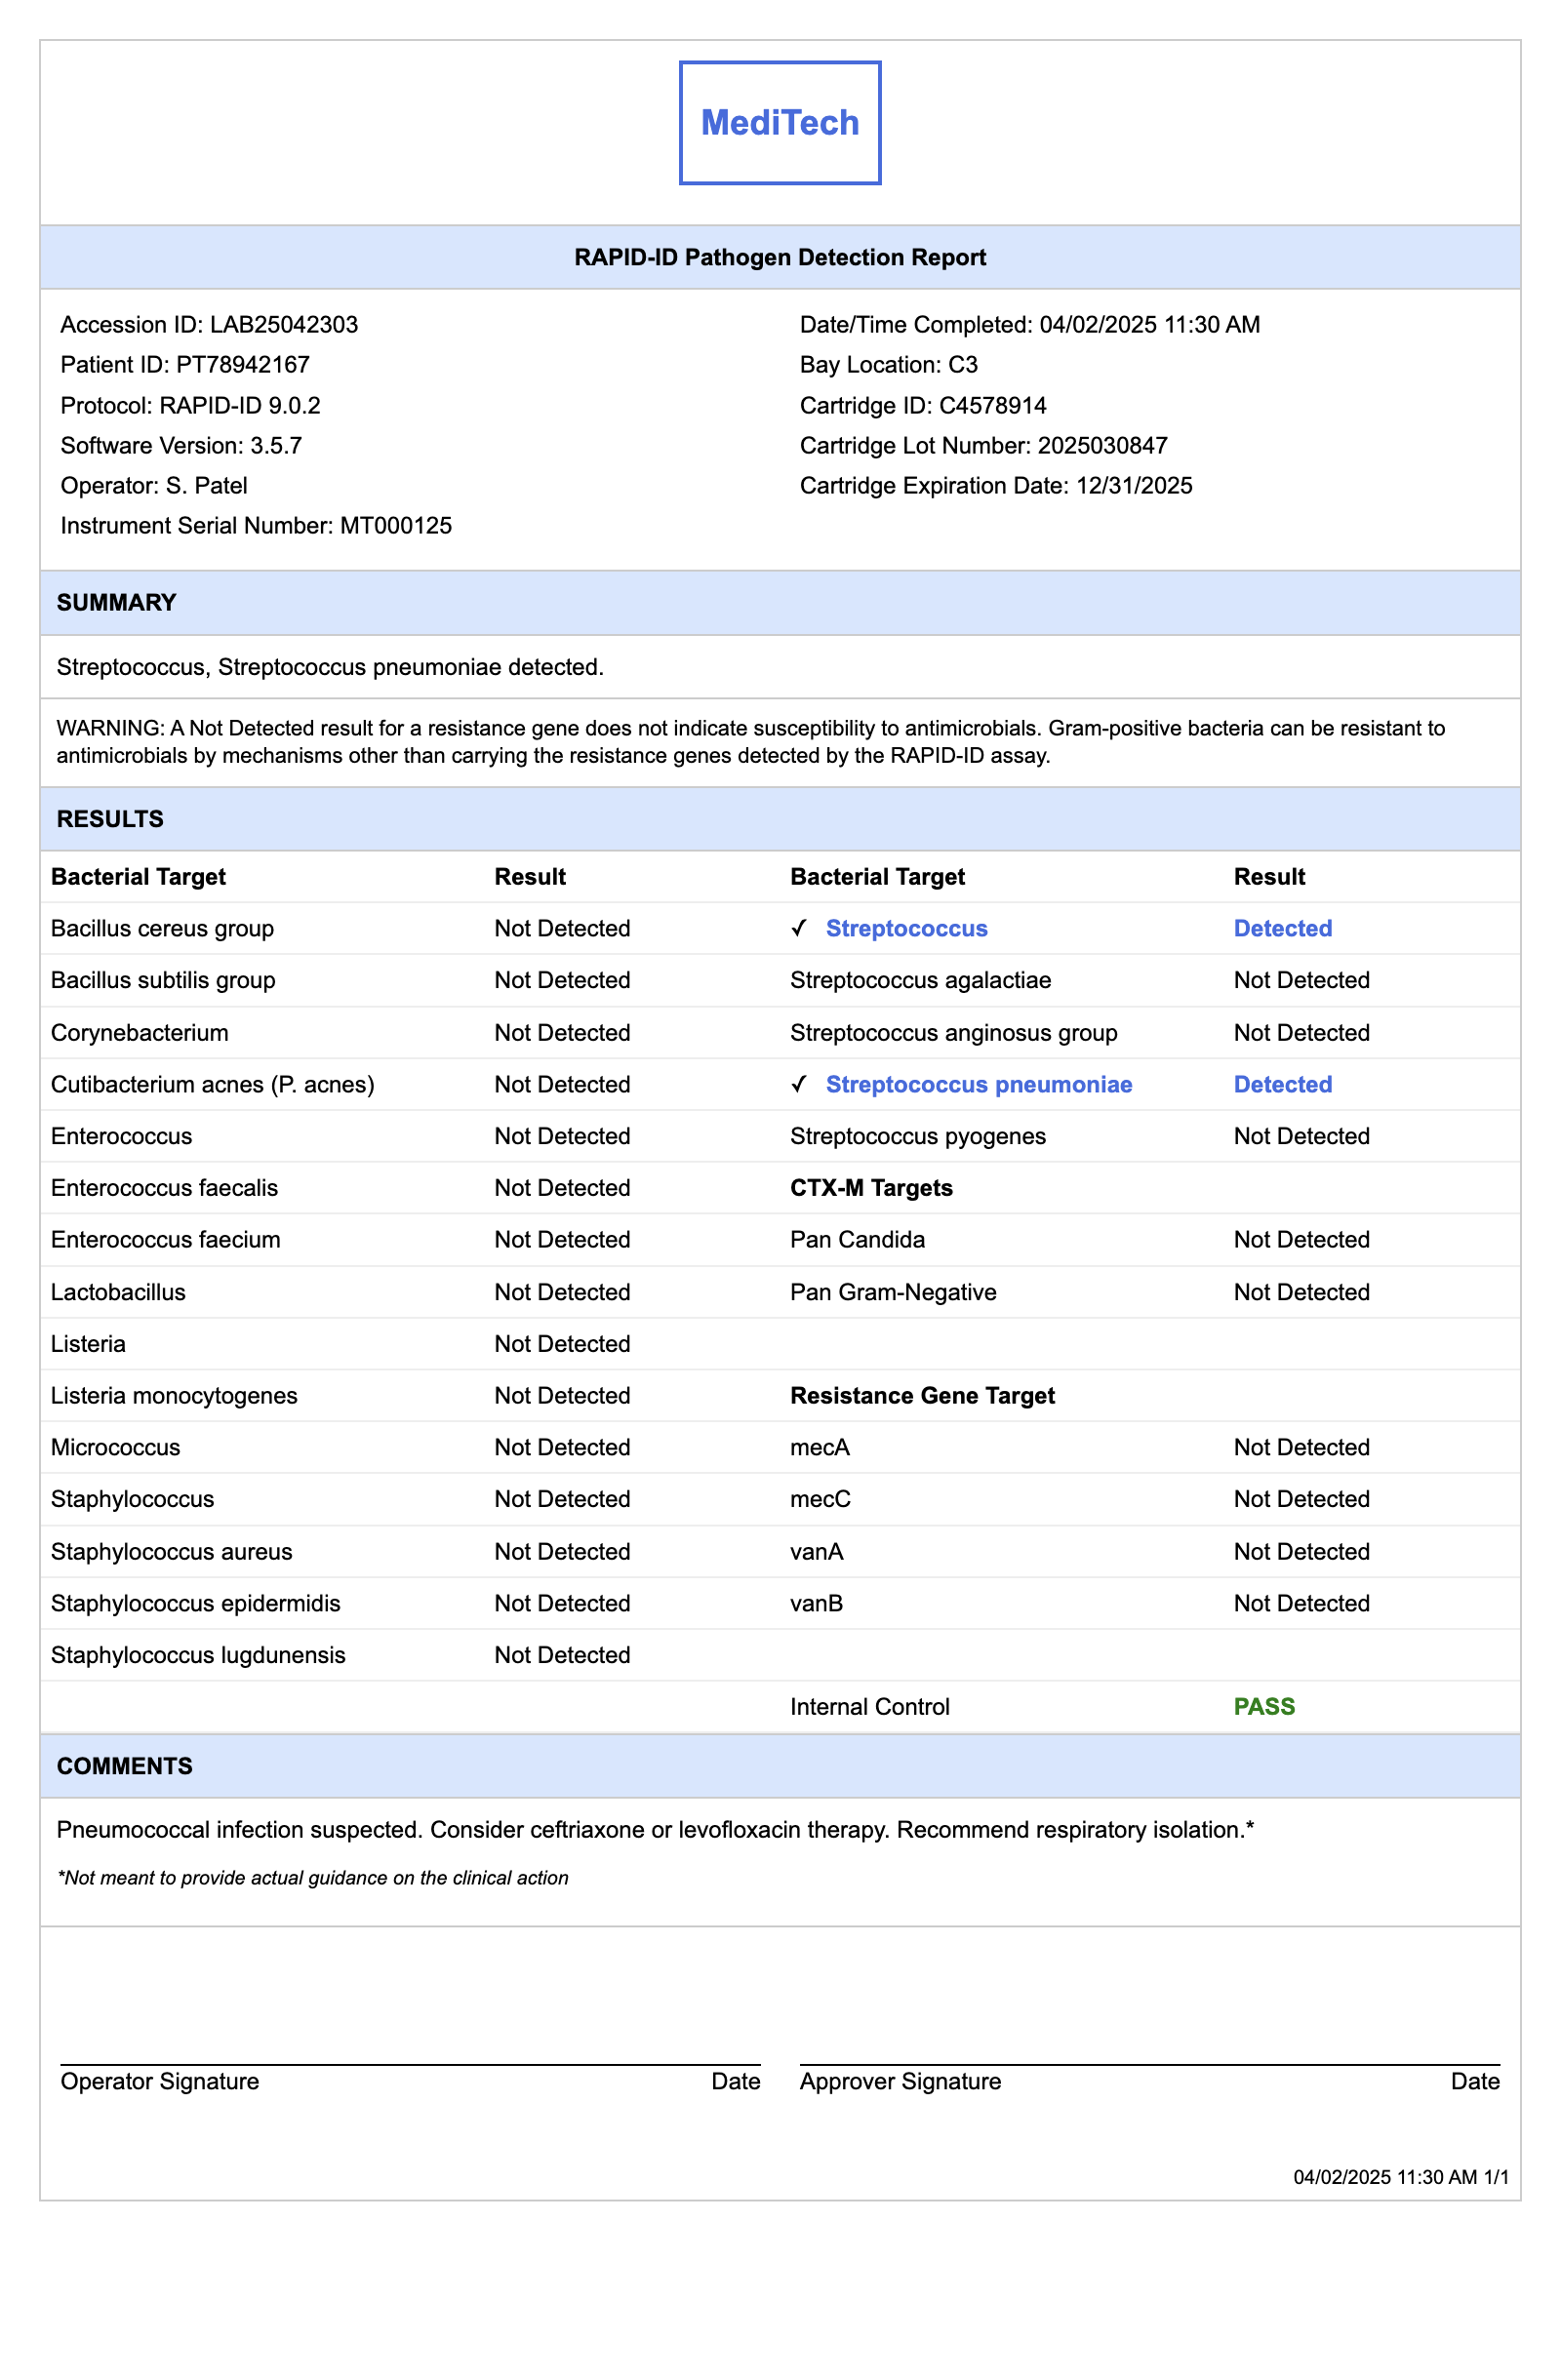

In [84]:
display(Image(filename=str(image_dir / 'html2image_test.png')))

## Convert HTML to PNG using html2image

In [89]:
chrome_path = "/Applications/Google Chrome.app/Contents/MacOS/Google Chrome"

utils.convert_html_to_png(html_dir_path=html_dir,
                          output_dir_path=image_dir,
                          size=(800, 1220),
                          browser_path=chrome_path,
                          custom_flags=['--headless=new'])

Found 7 HTML files in ../data/llm_html_reports
Converting to PNG in ../data/png_reports...


290226 bytes written to file /Users/mukti/Documents/learning_courses/image_to_data/synthetic_data_lab_reports/data/png_reports/claude_synthetic_report_5.png
292184 bytes written to file /Users/mukti/Documents/learning_courses/image_to_data/synthetic_data_lab_reports/data/png_reports/claude_synthetic_report_4.png
291722 bytes written to file /Users/mukti/Documents/learning_courses/image_to_data/synthetic_data_lab_reports/data/png_reports/claude_synthetic_report_3.png
291459 bytes written to file /Users/mukti/Documents/learning_courses/image_to_data/synthetic_data_lab_reports/data/png_reports/claude_synthetic_report_2.png
286518 bytes written to file /Users/mukti/Documents/learning_courses/image_to_data/synthetic_data_lab_reports/data/png_reports/claude_synthetic_report_1.png
293186 bytes written to file /Users/mukti/Documents/learning_courses/image_to_data/synthetic_data_lab_reports/data/png_reports/claude_synthetic_report_7.png


Rendered 9/7 PNGs.


300369 bytes written to file /Users/mukti/Documents/learning_courses/image_to_data/synthetic_data_lab_reports/data/png_reports/claude_synthetic_report_6.png


[PosixPath('../data/png_reports/imgkit_test.png'),
 PosixPath('../data/png_reports/html2image_test.png'),
 PosixPath('../data/png_reports/claude_synthetic_report_2.png'),
 PosixPath('../data/png_reports/claude_synthetic_report_3.png'),
 PosixPath('../data/png_reports/claude_synthetic_report_1.png'),
 PosixPath('../data/png_reports/claude_synthetic_report_4.png'),
 PosixPath('../data/png_reports/claude_synthetic_report_5.png'),
 PosixPath('../data/png_reports/claude_synthetic_report_7.png'),
 PosixPath('../data/png_reports/claude_synthetic_report_6.png')]

# Testing Gemini API

In [ ]:
# test API


client = genai.Client(api_key="YOUR_API_KEY")

response = client.models.generate_content(
    model="gemini-2.0-flash", contents="Explain how AI works in a few words"
)
print(response.text)
